In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)

# 1. The astrophysical $\gamma$-ray emissivity measurements
This first part shows how to read and interpret the measurements of the $\gamma$-ray emissivity, described in Section V.C of the paper.

We start by reading the data and printing its contents. We see that the file contains information about the 12 observed energy bins, the 6 redshift bins, the measurements in the 6x12 combinations of them, the associated covariance matrix, and the units of both measurements.

In [2]:
d = np.load("data/emissivity.npz")
print("File contents:", d.files)
print("Measurement shape:", d['emissivity'].shape)
print("Covariance shape:", d['covar'].shape)
print("Mean redshifts:", d['z_mean'])
print("Mean observed energies:", d['E_mean'])
print("Energy units: ", d['units_energy'])
print("Emissivity units: ", d['units_emissivity'])

File contents: ['E_edges', 'E_mean', 'z_mean', 'emissivity', 'covar', 'units_energy', 'units_emissivity']
Measurement shape: (6, 12)
Covariance shape: (6, 12, 6, 12)
Mean redshifts: [0.06415695 0.13496442 0.18685257 0.23646067 0.28633307 0.34014488]
Mean observed energies: [  0.72443596   1.31825674   2.29086765   3.9810717    6.60693448
  11.48153621  19.05460715  30.1995172   54.95408742  95.49925842
 199.52623097 575.43993692]
Energy units:  GeV
Emissivity units:  cm^-3 s^-1 Gev^-1


Let us now reproduce Fig. 9 in the paper. Note that the observed energies need to be blueshifted to the rest-frame.

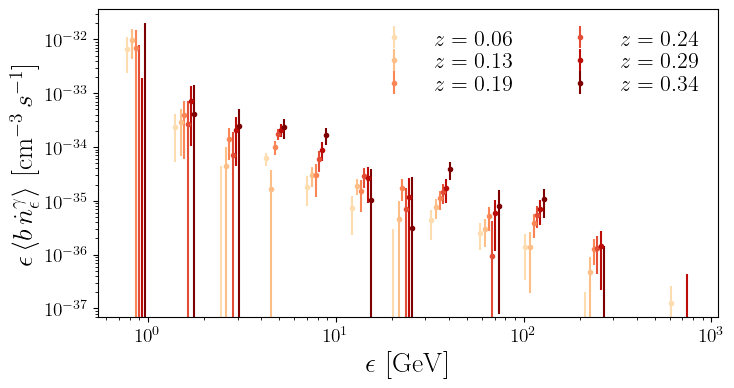

In [3]:
plt.figure(figsize=(8, 4))
ax = plt.gca()
cols = plt.cm.OrRd(np.linspace(0.2, 1, 6))
for i in range(6):
    z = d['z_mean'][i]
    emiss = d['emissivity'][i]
    cov = d['covar'][i, :, i, :]
    err = np.sqrt(np.diag(cov))
    col = cols[i]
    # Rest-frame energy
    Erest = d['E_mean']*(1+z)
    ax.errorbar(Erest, Erest*emiss, yerr=Erest*err, fmt='.',
                 label=r'$z=%.2lf$' % z, c=col)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(frameon=False, ncol=2, fontsize=16, labelspacing=0.1)
ax.set_xlabel(r'$\epsilon\,\,[{\rm GeV}]$', fontsize=20)
ax.set_ylabel(r'$\epsilon\,\langle b\,\dot{n}_\epsilon^\gamma\rangle\,\,[{\rm cm}^{-3}\,s^{-1}]$', fontsize=20)
ax.tick_params(axis='both', labelsize=14)